<a href="https://colab.research.google.com/github/pranavi2013/DA-Python/blob/main/Lab_10_DAUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("awaiskaggler/insurance-csv")

print("Path to dataset files:", path)

100%|██████████| 13.4k/13.4k [00:00<00:00, 14.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1


In [ ]:
ls  /root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1


insurance.csv


In [ ]:
path="/root/.cache/kagglehub/datasets/awaiskaggler/insurance-csv/versions/1/insurance.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(path)
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
import pandas as pd
from scipy.stats import binom

def binomial_probability(n, k, p):
    from math import comb
    return comb(n, k) * (p**k) * ((1-p)**(n-k))

n = 10  # Number of trials (individuals selected)
p = 0.3 # Probability of success (smoker)
probability_at_least_4 = 0
for k in range(4, n+1):
    probability_at_least_4 += binomial_probability(n, k, p)


# Compare with the pbinom function in R (using Python's scipy.stats.binom)
probability_at_least_4_scipy = 1 - binom.cdf(3, n, p)


print(f"Probability of at least 4 smokers (calculated): {probability_at_least_4}")
print(f"Probability of at least 4 smokers (scipy.stats.binom): {probability_at_least_4_scipy}")


Probability of at least 4 smokers (calculated): 0.3503892815999999
Probability of at least 4 smokers (scipy.stats.binom): 0.3503892815999998


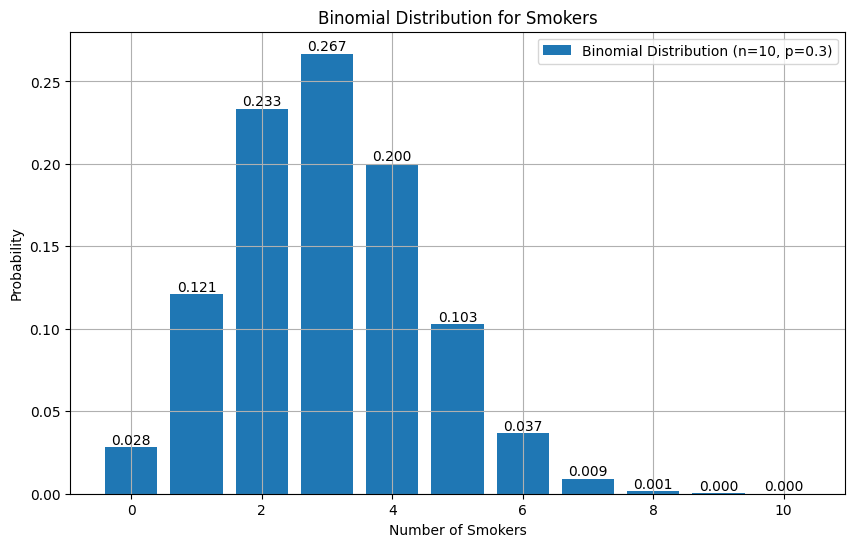

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom
n = 10
p = 0.3
x = range(n + 1)
probabilities = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, probabilities, label='Binomial Distribution (n=10, p=0.3)')

plt.xlabel("Number of Smokers")
plt.ylabel("Probability")
plt.title("Binomial Distribution for Smokers")

for i, prob in enumerate(probabilities):
  plt.annotate(f"{prob:.3f}", (i, prob), ha='center', va='bottom')

plt.legend()
plt.grid(True)
plt.show()


In [ ]:

from scipy.stats import binom

p = 0.20

n = 15

k = 5

probability = binom.pmf(k, n, p)

print(f"The probability that exactly 5 individuals have charges above $20,000 is: {probability}")


The probability that exactly 5 individuals have charges above $20,000 is: 0.10318229431910408


In [ ]:

cumulative_probability = binom.cdf(5, n, p)

print(f"The cumulative probability that at most 5 individuals have charges above $20,000 is: {cumulative_probability}")


The cumulative probability that at most 5 individuals have charges above $20,000 is: 0.9389485703823359


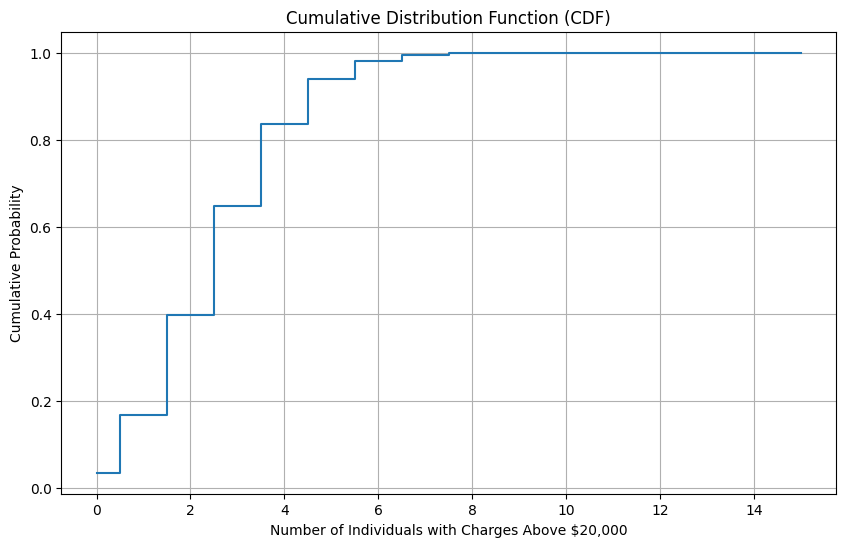

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the binomial distribution
n = 15  # Number of trials
p = 0.20  # Probability of success

# Generate values for the x-axis (number of successes)
x = range(n + 1)

# Calculate the cumulative probabilities using binom.cdf
cumulative_probabilities = binom.cdf(x, n, p)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.step(x, cumulative_probabilities, where='mid', label='CDF (n=15, p=0.2)')

plt.xlabel("Number of Individuals with Charges Above $20,000")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")

# Add grid and labels for better visualization
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
regions = {
    'southwest': 0.25,
    'southeast': 0.30,
    'northwest': 0.20,
    'northeast': 0.35
}

# Example: Calculate probability of at least 4 smokers in a sample of 10 from the Southwest region.
n = 10
p = regions['southwest']
probability_at_least_4_southwest = 1 - binom.cdf(3, n, p)

print(f"Probability of at least 4 smokers in a sample of 10 from Southwest region: {probability_at_least_4_southwest}")


# Calculate and print for other regions
for region, p in regions.items():
    probability_at_least_4 = 1 - binom.cdf(3, n, p)
    print(f"Probability of at least 4 smokers in a sample of 10 from {region.title()} region: {probability_at_least_4}")


Probability of at least 4 smokers in a sample of 10 from Southwest region: 0.22412490844726562
Probability of at least 4 smokers in a sample of 10 from Southwest region: 0.22412490844726562
Probability of at least 4 smokers in a sample of 10 from Southeast region: 0.3503892815999998
Probability of at least 4 smokers in a sample of 10 from Northwest region: 0.12087388160000012
Probability of at least 4 smokers in a sample of 10 from Northeast region: 0.48617298364414063


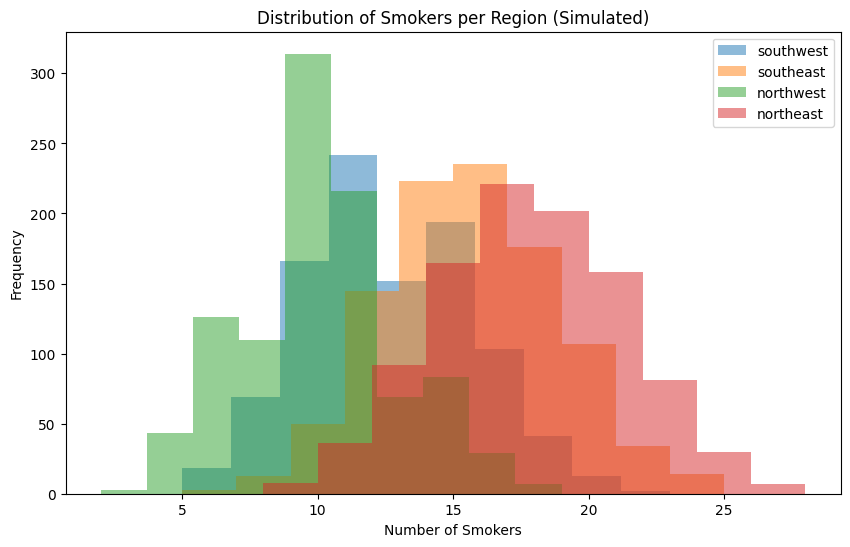

Expected Number of Smokers (n=50):
Southwest: 12.50
Southeast: 15.00
Northwest: 10.00
Northeast: 17.50

Mean Number of Smokers (Simulated, n=50):
Southwest: 12.53
Southeast: 15.14
Northwest: 10.06
Northeast: 17.36


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

simulated_smokers = {}
n = 50

for region, p in regions.items():
    simulated_smokers[region] = np.random.binomial(n, p, 1000)

plt.figure(figsize=(10, 6))

for region, smokers in simulated_smokers.items():
    plt.hist(smokers, alpha=0.5, label=region)
    plt.xlabel("Number of Smokers")
    plt.ylabel("Frequency")
    plt.title("Distribution of Smokers per Region (Simulated)")
plt.legend()
plt.show()
expected_smokers = {region: n * p for region, p in regions.items()}
print("Expected Number of Smokers (n=50):")
for region, expected in expected_smokers.items():
    print(f"{region.title()}: {expected:.2f}")

print("\nMean Number of Smokers (Simulated, n=50):")
for region, smokers in simulated_smokers.items():
  print(f"{region.title()}: {np.mean(smokers):.2f}")


The threshold insurance charge for high-risk is: $34831.72
The probability of selecting 8 high-risk individuals in a sample of 30 is: 0.0058


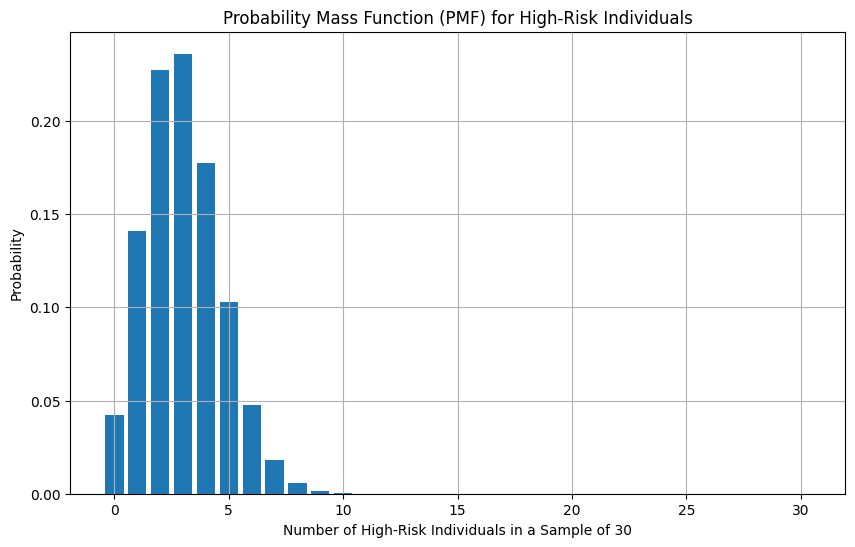

In [ ]:
from scipy.stats import binom

threshold = df['expenses'].quantile(0.9)
print(f"The threshold insurance charge for high-risk is: ${threshold:.2f}")

p_high_risk = sum(df['expenses'] > threshold) / len(df['expenses'])
probability_8_high_risk = binom.pmf(8, 30, p_high_risk)
print(f"The probability of selecting 8 high-risk individuals in a sample of 30 is: {probability_8_high_risk:.4f}")

import matplotlib.pyplot as plt

k_values = range(31)
probabilities = [binom.pmf(k, 30, p_high_risk) for k in k_values]

plt.figure(figsize=(10, 6))
plt.bar(k_values, probabilities)
plt.xlabel("Number of High-Risk Individuals in a Sample of 30")
plt.ylabel("Probability")
plt.title("Probability Mass Function (PMF) for High-Risk Individuals")
plt.grid(True)
plt.show()


Probability of at least 5 (using binom.cdf): 0.5618217779200001
Probability of at least 5 (manual calculation): 0.5618217779200001


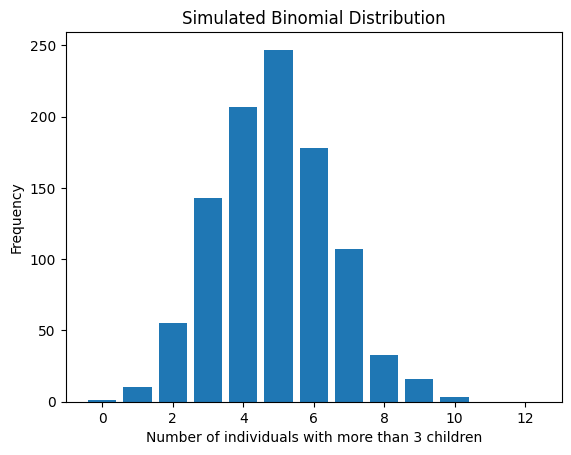

Simulated Mean: 4.867
Theoretical Mean: 4.800000000000001
Simulated Variance: 2.675311
Theoretical Variance: 2.8800000000000003


In [ ]:
from scipy.stats import binom
from math import comb

n = 12
p = 0.4
probability_at_least_5_pbinom = 1 - binom.cdf(4, n, p)
print(f"Probability of at least 5 (using binom.cdf): {probability_at_least_5_pbinom}")

probability_at_least_5_manual = 0
for k in range(5, n + 1):
    probability_at_least_5_manual += comb(n, k) * (p**k) * ((1-p)**(n-k))
print(f"Probability of at least 5 (manual calculation): {probability_at_least_5_manual}")

import matplotlib.pyplot as plt
import numpy as np

simulated_data = np.random.binomial(n, p, 1000)
plt.hist(simulated_data, bins=range(n+2), align='left', rwidth=0.8)
plt.xlabel("Number of individuals with more than 3 children")
plt.ylabel("Frequency")
plt.title("Simulated Binomial Distribution")
plt.show()

simulated_mean = np.mean(simulated_data)
simulated_variance = np.var(simulated_data)

theoretical_mean = n * p
theoretical_variance = n * p * (1 - p)

print(f"Simulated Mean: {simulated_mean}")
print(f"Theoretical Mean: {theoretical_mean}")
print(f"Simulated Variance: {simulated_variance}")
print(f"Theoretical Variance: {theoretical_variance}")
